#Chapter 9: What we have covered so far (and a bit more)

---

In this chapter, we will work our way through a concise review of the Python functionality we have covered so far. Throughout this chapter, we will work with a interesting, yet not too large dataset, namely the well-known *Arabian nights*. *Alf Laylah Wa Laylah*, *the Stories of One Thousand and One Nights* is a collection of folk tales, collected over many centuries by various authors, translators, and scholars across West, Central and South Asia and North Africa. It forms a huge narrative wheel with an overarching plot, created by the frame story of Shahrazad.

> The stories begin with the tale of king Shahryar and his brother, who, having both been deceived by their respective Sultanas, leave their kingdom, only to return when they have found someone who — in their view — was wronged even more. On their journey the two brothers encounter a huge jinn who carries a glass box containing a beautiful young woman. The two brothers hide as quickly as they can in a tree. The jinn lays his head on the girl’s lap and as soon as he is asleep, the girl demands the two kings to make love to her or else she will wake her ‘husband’. They reluctantly give in and the brothers soon discover that the girl has already betrayed the jinn ninety-eight times before. This exemplar of lust and treachery strengthens the Sultan’s opinion that all women are wicked and not to be trusted. 

> When king Shahryar returns home, his wrath against women has grown to an unprecedented level. To temper his anger, each night the king sleeps with a virgin only to execute her the next morning. In order to make an end to this cruelty and save womanhood from a "virgin scarcity", Sharazad offers herself as the next king’s bride. On the first night, Sharazad begins to tell the king a story, but she does not end it. The king’s curiosity to know how the story ends, prevents him from executing Shahrazad. The next night Shahrazad finishes her story, and begins a new one. The king, eager to know the ending of this tale as well, postpones her execution once more. Using this strategy for One Thousand and One Nights in a labyrinth of stories-within-stories-within-stories, Shahrazad attempts to gradually move the king’s cynical stance against women towards a politics of love and justice (see Marina Warner’s *Stranger Magic* (2013) in case you're interested).

The first European version of the Nights was translated into French by Antoine Galland. Many translations (in different languages) followed, such as the (heavily criticized) English translation by Sir Richard Francis Burton entitled *The Book of the Thousand and a Night* (1885). This version is freely available from the Gutenberg project (see [here](http://www.gutenberg.org)), and will be the one we will explore here.

# Files and directories

In the notebooks we use, there is a convenient way to quickly inspect the contents of a folder using the `ls` command. Our Arabian nights are contained under the general `data` folder:

In [2]:
ls data/arabian_nights

1000.txt  211.txt  324.txt  439.txt  551.txt  664.txt  777.txt  88.txt
1001.txt  212.txt  325.txt  43.txt   552.txt  665.txt  778.txt  890.txt
100.txt   213.txt  326.txt  440.txt  553.txt  666.txt  779.txt  891.txt
101.txt   214.txt  327.txt  441.txt  554.txt  667.txt  77.txt   892.txt
102.txt   215.txt  328.txt  442.txt  555.txt  668.txt  780.txt  893.txt
103.txt   216.txt  329.txt  443.txt  556.txt  669.txt  781.txt  894.txt
104.txt   217.txt  32.txt   444.txt  557.txt  66.txt   782.txt  895.txt
105.txt   218.txt  330.txt  445.txt  558.txt  670.txt  783.txt  896.txt
106.txt   219.txt  331.txt  446.txt  559.txt  671.txt  784.txt  897.txt
107.txt   21.txt   332.txt  447.txt  55.txt   672.txt  785.txt  898.txt
108.txt   220.txt  333.txt  448.txt  560.txt  673.txt  786.txt  899.txt
109.txt   221.txt  334.txt  449.txt  561.txt  674.txt  787.txt  89.txt
10.txt    222.txt  335.txt  44.txt   562.txt  675.txt  788.txt  8.txt
110.txt   223.txt  336.txt  450.txt  563.txt  676.txt  789.txt  900.

As you can see, this folder holds a number of plain text files, ending in the `.txt` extension. Let us open a random file:

In [3]:
f = open('data/arabian_nights/848.txt', 'r')
text = f.read()
f.close()
print(text[:500])

,
She pursued, It hath reached me, O auspicious King, that when Zayn al-Mawasif took from the Kazi the deed which made over her lover's property to her, she said to him, "O Masrur, now gang thy gait." But her slave-girl Hubub turned to him and said, "Recite us some verses." So he improvised upon that game of chess these couplets,
"Of Time and what befel me I complain, * Mourning my loss by chess and eyes of bane.  
 For love of gentlest, softest-sided fair * Whose like is not of maids or mortal 


Here, we use the `open()` function to create a file object `f`, which we can use to access the actual text content of the file. Make sure that you do not pass the `'w'` parameter ("write") to `open()`, instead of `'r'` ("read"), since this would overwrite and thus erase the existing file.  After assigning the string returned by `f.read()` to the variable `text`, we print the 500 first characters of `text` to get an impression of what it contains, using simple string indexing (`[:500]`). Don't forget to close the file again after you have opened or strange things could happen to your file! One little trick which is commonly used to avoid having to explicitly open and close your file is a `with` block (mind the indentation):

In [4]:
with open('data/arabian_nights/848.txt', 'r') as f:
    text = f.read()
print(text[:500])

,
She pursued, It hath reached me, O auspicious King, that when Zayn al-Mawasif took from the Kazi the deed which made over her lover's property to her, she said to him, "O Masrur, now gang thy gait." But her slave-girl Hubub turned to him and said, "Recite us some verses." So he improvised upon that game of chess these couplets,
"Of Time and what befel me I complain, * Mourning my loss by chess and eyes of bane.  
 For love of gentlest, softest-sided fair * Whose like is not of maids or mortal 


This code block does exactly the same thing as the previous one but saves you some typing. In this chapter we would like to work with all the files in the `arabian_nights` directory. This is where loops come in handy of course, since what we really would like to do, is iterate over the contents of the directory. Accessing these contents in Python is easy, but requires importing some extra functionality. In this case, we need to import the `os` module, which contains all functionality related to the 'operating system' of your machine, such as directory information:  

In [5]:
import os

Using the dot-syntax (`os.xxx`), we can now access all functions that come with this module, such as `listdir()`, which returns a list of the items which are included under a given directory

In [6]:
filenames = os.listdir('data/arabian_nights')
print(len(filenames))
print(filenames[:20])

999
['414.txt', '17.txt', '376.txt', '669.txt', '632.txt', '204.txt', '819.txt', '848.txt', '318.txt', '998.txt', '538.txt', '510.txt', '220.txt', '763.txt', '668.txt', '307.txt', '619.txt', '175.txt', '21.txt', '111.txt']


The function `os.listdir()` returns a list of strings, representing the filenames contained under a directory.

## Quiz

1. In Burton's translation some of the 1001 nights are missing. How many?
2. Can you come up with a clever way to find out which nights are missing? Hint: a counting loop and some string casting might be useful here!

In [7]:


for n in range(1,1001):
    if n not in [int(n.rstrip(".txt")) for n in filenames]:
        print("night #{} has not been translated, what a shame :(".format(n))

night #396 has not been translated, what a shame :(
night #397 has not been translated, what a shame :(


With `os.listdir()`, you need to make sure that you pass the correct path to an existing directory:  

In [8]:
#os.listdir('data/belgian_nights')

FileNotFoundError: [Errno 2] No such file or directory: 'data/belgian_nights'

It might therefore be convenient to check whether a directory actually exists in a given location:

In [ ]:
#print(os.path.isdir('data/arabian_nights'))
#print(os.path.isdir('data/belgian_nights'))

The second directory, naturally, does not exist and `isdir()` evaluates to `False` in this case. Creating a new (and thus empty) directory is also easy using `os`:

In [ ]:
#os.mkdir('belgian_nights')

We can see that it lives in the present working directory now, by typing `ls` again:

In [ ]:
ls

Or we use Python:

In [ ]:
#print(os.path.isdir('belgian_nights'))

Removing directories is also easy, but PLEASE watch out, sometimes it is too easy: if you remove a wrong directory in Python, it will be gone forever... Unlike other applications, Python does not keep a copy of it in your Trash and it does not have a Ctrl-Z button. Please watch out with what you do, since with great power comes great responsiblity! Removing the entire directory which we just created can be done as follows:  

In [ ]:
import shutil
shutil.rmtree('belgian_nights')

And lo behold: the directory has disappeared again:

In [ ]:
print(os.path.isdir('belgian_nights'))

Here, we use the `rmtree()` command to remove the entire directory in a *recursive* way: even if the directory isn't empty and contains files and subfolders, we will remove all of them. The `os` module also comes with a `rmdir()` but this will not allow you to remove a directory which is not empty, as becomes clear in the `OSError` raised below:  

In [ ]:
os.rmdir('data/arabian_nights')

The folder contains things and therefore cannot be removed using this function. There are, of course, also ways to remove individual files or check whether they exist:

In [ ]:
os.mkdir('belgian_nights')
f = open('belgian_nights/1001.txt', 'w')
f.write('Content')
f.close()
print(os.path.exists('belgian_nights/1001.txt'))
os.remove('belgian_nights/1001.txt')
print(os.path.exists('belgian_nights/1001.txt'))

Here, we created a directory, wrote a new file to it (`1001.txt`), and removed it again. Using `os.path.exists()` we monitored at which point the file existed. Finally, the `shutil` module also ships with a useful `copyfile()` function which allows you to copy files from one location to another, possibly with another name. To copy night 66 to the present directory, for instance, we could do: 

In [ ]:
shutil.copyfile('data/arabian_nights/66.txt', 'new_66.txt')

Indeed, we have added an exact copy of night 66 to our present working directory:

In [ ]:
ls

We can safely remove it again:

In [ ]:
os.remove('new_66.txt')

## Paths

The paths we have used so far are 'relative' paths, in the sense that they are relative to the place on our machine from which we execute our Python code. Absolute paths can also be retrieved and will differ on each computer, because they typically include user names etc:

In [ ]:
os.path.abspath('data/arabian_nights/848.txt')

While absolute paths are longer to type, they have the advantage that they can be used anywhere on your computer (i.e. irrespective of where you run your code from). Paths can be tricky. Suppose that we would like to open one of our filenames:

In [ ]:
filenames = os.listdir('data/arabian_nights')
random_filename = filenames[9]
with open(random_filename, 'r') as f:
    text = f.read()
print(text[:500])

Python throws a `FileNotFoundError`, complaining that the file we wish to open does not exist. This situation stems from the fact that `os.listdir()` only returns the base name of a given file, and not an entire (absolute or relative) path to it. To properly access the file, we must therefore not forget to include the rest of the path again: 

In [ ]:
filenames = os.listdir('data/arabian_nights')
random_filename = filenames[9]
with open('data/arabian_nights/'+ random_filename, 'r') as f:
    text = f.read()
print(text[:500])

Apart from `os.listdir()` there are a number of other common ways to obtain directory listings in Python. Using the `glob` module for instance, we can easily access the full relative path leading to our Arabian Nights:  

In [ ]:
import glob
filenames = glob.glob('data/arabian_nights/*')
print(filenames[:10])

The asterisk (`*`) in the argument passed to `glob.glob()` is worth noting here. Just like with regular expressions, this asterisk is a sort of wildcard which will match any series of characters (i.e. the filenames under `arabian_nights`). When we exploit this wildcard syntax, `glob.glob()` offers another distinct advantage: we can use it to easily filter out filenames which we are not interested in:

In [ ]:
filenames = glob.glob('data/arabian_nights/*.txt')
print(filenames[:10])

Interestingly, the command in this code block will only load filenames that end in `".txt"`. This is interesting when we would like to ignore other sorts of junk files etc. that might be present in a directory. To replicate similar behaviour with `os.listdir()`, we would have needed a typical `for`-loop, such as:

In [ ]:
filenames = []
for fn in os.listdir('data/arabian_nights'):
    if fn.endswith('.txt'):
        filenames.append(fn)
print(filenames[:10])

Or for you stylish coders out there, you can show off with a list comprehension:

In [10]:
filenames = [fn for fn in os.listdir('data/arabian_nights') if fn.endswith('.txt')]

However, when using `glob.glob()`, you might sometimes want to be able to extract a file's base name again. There are several solutions to this:

In [ ]:
filenames = glob.glob('data/arabian_nights/*.txt')
fn = filenames[10]

# simple string splitting:
print(fn.split('/')[-1])

# using os.sep:
print(fn.split(os.sep)[-1])

# using os.path:
print(os.path.basename(fn))



In [9]:
from pathlib import Path

def fnames(dirpath):
    p = Path(dirpath)
    x = sorted([f.parts[-1].rstrip(".txt") for f in p.glob("*")],key=int)
    for n in x:
        yield "{}{}.txt".format(dirpath,n)
        
for x in fnames("data/arabian_nights/"):
    print(x)

data/arabian_nights/1.txt
data/arabian_nights/2.txt
data/arabian_nights/3.txt
data/arabian_nights/4.txt
data/arabian_nights/5.txt
data/arabian_nights/6.txt
data/arabian_nights/7.txt
data/arabian_nights/8.txt
data/arabian_nights/9.txt
data/arabian_nights/10.txt
data/arabian_nights/11.txt
data/arabian_nights/12.txt
data/arabian_nights/13.txt
data/arabian_nights/14.txt
data/arabian_nights/15.txt
data/arabian_nights/16.txt
data/arabian_nights/17.txt
data/arabian_nights/18.txt
data/arabian_nights/19.txt
data/arabian_nights/20.txt
data/arabian_nights/21.txt
data/arabian_nights/22.txt
data/arabian_nights/23.txt
data/arabian_nights/24.txt
data/arabian_nights/25.txt
data/arabian_nights/26.txt
data/arabian_nights/27.txt
data/arabian_nights/28.txt
data/arabian_nights/29.txt
data/arabian_nights/30.txt
data/arabian_nights/31.txt
data/arabian_nights/32.txt
data/arabian_nights/33.txt
data/arabian_nights/34.txt
data/arabian_nights/35.txt
data/arabian_nights/36.txt
data/arabian_nights/37.txt
data/arabi

Both `os.sep` and `os.path.basename` have the advantage that they know what separator is used for paths in the operating system, so you don't need to explicitly code it like in the first solution. Separators differ between Windows (backslash) and Mac/Linux (forward slash).

Finally, sometimes, you might be interested in all the subdirectories of a particular directory (and all the subdirectories of these subdirectories etc.). Parsing such deep directory structures can be tricky, especially if you do not know how deep a directory tree might run. You could of course try stacking multiple loops using `os.listdir()`, but a more convenient way is `os.walk()`:

In [ ]:
for root, directory, filename in os.walk("data"):
    print(filename)


As you can see, `os.walk()` allows you to efficiently loop over the entire tree. As always, don't forget that help is right around the corner in your notebooks. Using `help()`, you can quickly access the documentation of modules and their functions etc. (but only after you have imported the modules first!).

In [ ]:
help(os.walk)

## Quiz

In the next part of this chapter, we will need a way to sort our stories from the first, to the very last night. For our own convenience we will use a little hack for this. In this quiz, we would like you to create a new folder under `data` directory, called '1001'. You should copy all the original files from `arabian_nights` to this new folder, but give the files a new name, prepending zeros to filename until all nights have four digits in their name. `1001.txt` stays `1001.txt`, for instance, but `66.txt` becomes `0066.txt` and `2.txt` becomes `0002.txt` etc. This will make sorting the nights easier below. For this quiz you could for instance use a for loop in combination with a while loop (but don't get stuck in endless loops...)

In [ ]:
import shutil
p_1001 = Path("data/1001/")
p_an = Path("data/arabian_nights/")
#p_1001.mkdir()
for x in fnames(p_an):
    shutil.copyfile(str(p_an.joinpath(x)), str(p_1001.joinpath(x.rjust(8,'0'))))




In [ ]:
with open("data/1001/0234.txt", "r") as just_checkin:
    print(just_checkin.read())

## Parsing files

Using the code from the previous quiz, it is now trivial to sort our nights sequentially on the basis of their actual name (i.e. a string variable):

In [11]:
for fn in sorted(os.listdir('data/1001')):
    print(fn)

0001.txt
0002.txt
0003.txt
0004.txt
0005.txt
0006.txt
0007.txt
0008.txt
0009.txt
0010.txt
0011.txt
0012.txt
0013.txt
0014.txt
0015.txt
0016.txt
0017.txt
0018.txt
0019.txt
0020.txt
0021.txt
0022.txt
0023.txt
0024.txt
0025.txt
0026.txt
0027.txt
0028.txt
0029.txt
0030.txt
0031.txt
0032.txt
0033.txt
0034.txt
0035.txt
0036.txt
0037.txt
0038.txt
0039.txt
0040.txt
0041.txt
0042.txt
0043.txt
0044.txt
0045.txt
0046.txt
0047.txt
0048.txt
0049.txt
0050.txt
0051.txt
0052.txt
0053.txt
0054.txt
0055.txt
0056.txt
0057.txt
0058.txt
0059.txt
0060.txt
0061.txt
0062.txt
0063.txt
0064.txt
0065.txt
0066.txt
0067.txt
0068.txt
0069.txt
0070.txt
0071.txt
0072.txt
0073.txt
0074.txt
0075.txt
0076.txt
0077.txt
0078.txt
0079.txt
0080.txt
0081.txt
0082.txt
0083.txt
0084.txt
0085.txt
0086.txt
0087.txt
0088.txt
0089.txt
0090.txt
0091.txt
0092.txt
0093.txt
0094.txt
0095.txt
0096.txt
0097.txt
0098.txt
0099.txt
0100.txt
0101.txt
0102.txt
0103.txt
0104.txt
0105.txt
0106.txt
0107.txt
0108.txt
0109.txt
0110.txt
0111.txt
0

Using the old filenames, this was not possible directly, because of the way Python sorts strings of unequal lengths. Note that the number in the filenames are represented as strings, which are completely different from real numeric integers, and thus will be sorted differently:

In [ ]:
for fn in sorted(os.listdir('data/arabian_nights/')):
    print(fn)

> Note: There is a more elegant, but also slightly less trivial way to achieve the correct order in this case:

In [12]:
for fn in sorted(os.listdir('data/arabian_nights/'),
                key=lambda nb: int(nb[:-4])):
    print(fn)

1.txt
2.txt
3.txt
4.txt
5.txt
6.txt
7.txt
8.txt
9.txt
10.txt
11.txt
12.txt
13.txt
14.txt
15.txt
16.txt
17.txt
18.txt
19.txt
20.txt
21.txt
22.txt
23.txt
24.txt
25.txt
26.txt
27.txt
28.txt
29.txt
30.txt
31.txt
32.txt
33.txt
34.txt
35.txt
36.txt
37.txt
38.txt
39.txt
40.txt
41.txt
42.txt
43.txt
44.txt
45.txt
46.txt
47.txt
48.txt
49.txt
50.txt
51.txt
52.txt
53.txt
54.txt
55.txt
56.txt
57.txt
58.txt
59.txt
60.txt
61.txt
62.txt
63.txt
64.txt
65.txt
66.txt
67.txt
68.txt
69.txt
70.txt
71.txt
72.txt
73.txt
74.txt
75.txt
76.txt
77.txt
78.txt
79.txt
80.txt
81.txt
82.txt
83.txt
84.txt
85.txt
86.txt
87.txt
88.txt
89.txt
90.txt
91.txt
92.txt
93.txt
94.txt
95.txt
96.txt
97.txt
98.txt
99.txt
100.txt
101.txt
102.txt
103.txt
104.txt
105.txt
106.txt
107.txt
108.txt
109.txt
110.txt
111.txt
112.txt
113.txt
114.txt
115.txt
116.txt
117.txt
118.txt
119.txt
120.txt
121.txt
122.txt
123.txt
124.txt
125.txt
126.txt
127.txt
128.txt
129.txt
130.txt
131.txt
132.txt
133.txt
134.txt
135.txt
136.txt
137.txt
138.txt
139.

> Should you be interested: here, we pass a `key` argument to sort, which specifies which operations should be applied to the filenames before actually sorting them. Here, we specify a so-called `lambda` function to key, which is less intuitive to read, but which allow you to specify a sort of 'mini-function' in a very condensed way: this lambda function chops off the last four characters from each filename and then converts (or 'casts') the results to a new data type using `int()`, namely an `integer` (a 'whole' number, as opposed to floating point numbers). Eventually, this leads to the same order. 

## More functions

So far, we have been using pre-existing, ready-made functions from Python's standard library, or the standard set of functionality which comes with the programming language. Importantly, there are two additional ways of using functions on your code, which we will cover below: (i) you can write your own functions, and (ii) you can use functions from other, external libraries, which have been developped by so-called 'third parties'. Below, we will for instance use plotting functions from `matplotlib`, which is a common visualization library for Python. 

At this point, we have an efficient way of looping over the Arabian Nights sequentially. What we still lack, are functions to load and clean our data. As you could see above, our files still contain a lot of punctuation marks etc., which are perhaps less interesting from the point of view of textual analysis. Let us write a simple function that takes a string as input, and returns a cleaner version of it, where all characters are lowercased, and only alphabetic characters are kept:

In [13]:
import re
def preprocess(in_str):
    out_str = ''
    for c in in_str.lower():
        if c.isalpha() or c.isspace():
            out_str += c
    whitespace = re.compile(r'\s+')
    out_str = whitespace.sub(' ', out_str)
    return out_str

This code reviews some of the materials from previous chapters, including the use of a regular expression, which converts all consecutive instances of whitespace (including line breaks, for instance) to a single space. After executing the previous code block, we can now test our function: 

In [14]:
old_str = 'This;     is -- a very    DIRTY string!'
new_str = preprocess(old_str)
print(new_str)



this is a very dirty string


We can now apply this function to the contents from a random night:

In [15]:
with open('data/1001/0007.txt', 'r') as f:
    in_str = f.read()
print(preprocess(in_str))

 she continued it hath reached me o auspicious king that when the fishes spoke and the young lady upset the frying pan with her rod and went forth by the way she came and the wall closed up the wazir cried out this is a thing not to be hidden from the king so he went and told him what had happened where upon quoth the king there is no help for it but that i see this with mine own eyes then he sent for the fisherman and commended him to bring four other fish like the first and to take with him three men as witnesses the fisherman at once brought the fish and the king after ordering them to give him four hundred gold pieces turned to the wazir and said up and fry me the fishes here before me the minister replying to hear is to obey bade bring the frying pan threw therein the cleansed fish and set it over the fire when lo the wall crave asunder and out burst a black slave like a huge rock or a remnant of the tribe ad bearing in hand a branch of a green tree and he cried in loud and terrib

This text looks cleaner already! We can now start to extract individual tokens from the text and count them. This process is called tokenization. Here, we make the naive assumption that words are simply space-free alphabetic strings -- which is of course wrong in the case of English words like "can't". Note that for many languages there exist better tokenizers in Python (such as the ones in the Natural Language Toolkit ([nltk](http://www.nltk.org/)). We suffice with a simpler approach for now:  

In [16]:
def tokenize(in_str):
    tokens = in_str.split()
    tokens = [t for t in tokens if t]
    return tokens  

Using the list comprehension, we make sure that we do not accidentally return empty strings as a token, for instance, at the beginning of a text which starts with a newline. Remember that anything in Python with a length of 0, will evaluate to `False`, which explains the `if t` in the comprehension: empty strings will fail this condition. We can start stacking our functions now:

In [26]:
with open('data/1001/0007.txt', 'r') as f:
    in_str = f.read()
tokens = tokenize(preprocess(in_str))
print(tokens[:10])

['she', 'continued', 'it', 'hath', 'reached', 'me', 'o', 'auspicious', 'king', 'that']


We can now start analyzing our nights. A good start would be to check the length of each night in words:

In [ ]:
print(len(tokens))

## Quiz

Iterate over all the nights in `1001` in a sorted way. Open, preprocess and tokenize each text. Store in a list called `word_counts` how many words each story has.

In [17]:
word_counts = []
for fn in fnames("data/1001/"):
    with open(fn,"r") as txt:
        prep = preprocess(txt.read())
    tok = tokenize(prep)
    word_counts.append(len(tok))
    

We now have a list of numbers, which we can plot over time. We will cover plotting more extensively in one of the next chapters. The things below are just a teaser. Start by importing `matplotlib`, which is imported as follows by convention:

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib64/python3.4/site-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


The second line is needed to make sure that the plots will properly show up in our notebook. Let us start with a simple visualization:

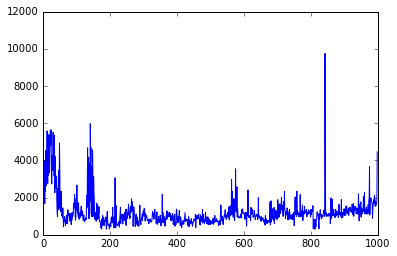

In [19]:
plt.plot(word_counts)

As you can see, this simple command can be used to quickly obtain a visualization that shows interesting trends. On the y-axis, we plot absolute word counts for each of our nights. The x-axis is figured out automatically by matplotlib and adds an index on the horizontal x-axis. Implicitly, it interprets our command as follows:

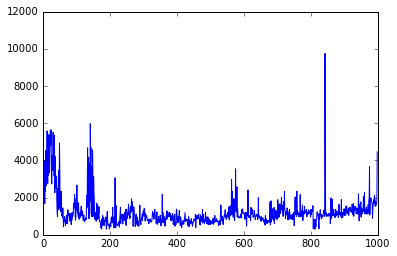

In [20]:
plt.plot(range(0, len(word_counts)), word_counts)

When `plt.plot` receives two flat lists as arguments, it plots the first along the x-axis, and the second along the y-axis. If it only receives one list, it plots it along the y-axis and uses the range we now (redundantly) specified here for the x-axis. This is in fact a subtoptimal plot, since the index of the first data point we plot is zero, although the name of the first night is '1.txt'. Additionally, we know that there are some nights missing in our data. To set this straight, we could pass in our own x-coordinates as follows:

In [21]:
filenames = sorted(os.listdir('data/1001'))
idxs = [int(i[:-4]) for i in filenames]
print(idxs[:20])
print(min(idxs))
print(max(idxs))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
1
1001


We can now make our plot more truthful, and add some bells and whistles:

(1, 1001)

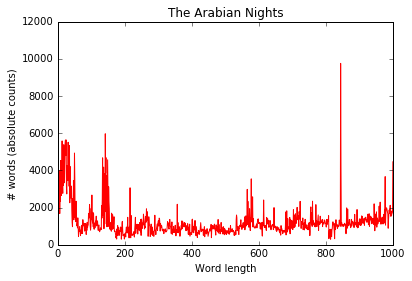

In [22]:
plt.plot(idxs, word_counts, color='r')
plt.xlabel('Word length')
plt.ylabel('# words (absolute counts)')
plt.title('The Arabian Nights')
plt.xlim(1, 1001)

## Quiz

> Using `axvline()` you can add vertical lines to a plot, for instance at position:

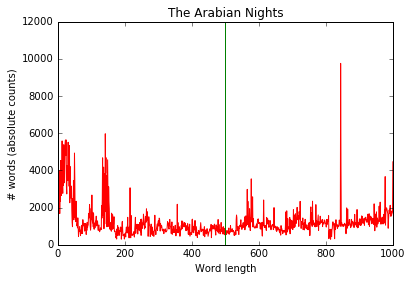

In [23]:
plt.plot(idxs, word_counts, color='r')
plt.xlabel('Word length')
plt.ylabel('# words (absolute counts)')
plt.title(r'The Arabian Nights')
plt.xlim(1, 1001)
plt.axvline(500, color='g')

> Write code that plots the position of the missing nights using this function (and blue lines).

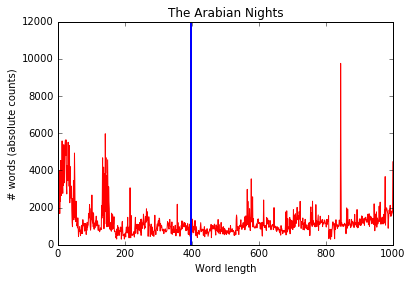

In [24]:
plt.plot(idxs, word_counts, color='r')
plt.xlabel('Word length')
plt.ylabel('# words (absolute counts)')
plt.title(r'The Arabian Nights')
plt.xlim(1, 1001)
missing_nights = []
for n in range(1,1001):
    if n not in [int(n.rstrip(".txt")) for n in filenames]:
        plt.axvline(n, color='b')

Right now, we are visualizing texts, but we might also be interested in the vocabulary used in the story collection. Counting how often a word appears in a text is trivial for you right now with custom code, for instance:

In [30]:
cnts1 = {}
cnts2 = {}
for word in tokens:
    if word in cnts1:
        cnts1[word] += 1
    else:
        cnts1[word] = 1

for w in tokens:
    cnts2[w] = cnts2.get(w, 0) + 1

print(cnts1 == cnts2)


True


One interesting item which you can use for counting in Python is the `Counter` object, which we can import as follows:

In [31]:
from collections import Counter

This `Counter` makes it much easier to write code for counting. Below you can see how this counter automatically creates a dictionary-like structure:

In [32]:
cnt = Counter(tokens)
print(cnt)

Counter({'and': 208, 'the': 188, 'of': 76, 'to': 72, 'a': 55, 'my': 51, 'his': 51, 'i': 48, 'he': 48, 'in': 35, 'she': 35, 'with': 32, 'was': 25, 'him': 24, 'thy': 21, 'this': 21, 'not': 21, 'it': 20, 'her': 20, 'as': 19, 'king': 19, 'but': 18, 'from': 18, 'me': 18, 'then': 17, 'when': 17, 'is': 16, 'o': 16, 'thou': 15, 'for': 15, 'that': 14, 'all': 14, 'on': 12, 'no': 12, 'our': 12, 'fishes': 12, 'at': 12, 'be': 12, 'so': 12, 'by': 11, 'upon': 11, 'what': 11, 'came': 11, 'till': 11, 'who': 11, 'thee': 11, 'before': 10, 'there': 10, 'which': 10, 'night': 9, 'went': 9, 'palace': 9, 'they': 9, 'quoth': 9, 'lord': 9, 'said': 8, 'up': 8, 'we': 8, 'down': 8, 'four': 8, 'how': 8, 'sleep': 8, 'had': 8, 'youth': 8, 'were': 7, 'its': 7, 'men': 7, 'fish': 7, 'sight': 7, 'out': 7, 'tarn': 7, 'slave': 7, 'eyes': 7, 'let': 6, 'will': 6, 'or': 6, 'man': 6, 'saw': 6, 'black': 6, 'forth': 6, 'set': 6, 'like': 6, 'an': 6, 'these': 6, 'one': 6, 'heard': 6, 'young': 6, 'shall': 6, 'over': 6, 'stood': 5, 

 If we would like to find which items are most frequent for instance, we could simply do:

In [33]:
print(cnt.most_common(25))

[('and', 208), ('the', 188), ('of', 76), ('to', 72), ('a', 55), ('my', 51), ('his', 51), ('i', 48), ('he', 48), ('in', 35), ('she', 35), ('with', 32), ('was', 25), ('him', 24), ('thy', 21), ('this', 21), ('not', 21), ('it', 20), ('her', 20), ('as', 19), ('king', 19), ('but', 18), ('from', 18), ('me', 18), ('then', 17)]


We can also pass the `Counter` the tokens to count in multiple stages:

In [34]:
cnt = Counter()
cnt.update(tokens)
cnt.update(tokens)
print(cnt.most_common(25))

[('and', 416), ('the', 376), ('of', 152), ('to', 144), ('a', 110), ('my', 102), ('his', 102), ('i', 96), ('he', 96), ('in', 70), ('she', 70), ('with', 64), ('was', 50), ('him', 48), ('thy', 42), ('this', 42), ('not', 42), ('it', 40), ('her', 40), ('as', 38), ('king', 38), ('but', 36), ('from', 36), ('me', 36), ('then', 34)]


After passing our `tokens` twice to the counter, we see that the numbers double in size.

## Quiz

Write code that makes a word frequency counter named `vocab`, which counts the cumulative frequencies of all words in the Arabian Nights. Which are the 15 most frequent words? Does that make sense?

In [48]:
vocab = Counter()
for fn in fnames("data/arabian_nights/"):
    
    with open(fn,"r") as txt:
        prep_txt = tokenize(preprocess(txt.read()))
        vocab.update(prep_txt)

# print(vocab.most_common(15)) # the most frequent words are function words that are generally quite frequent

Counter({'potent': 8,
         'undergroundway': 1,
         'high': 533,
         'errors': 3,
         'whisked': 1,
         'cheekmole': 1,
         'ansaris': 5,
         'defended': 4,
         'allowing': 5,
         'transacted': 1,
         'interpreted': 3,
         'almuhaliyah': 1,
         'survivors': 3,
         'deignèdest': 1,
         'forfend': 17,
         'twinkling': 18,
         'bestrided': 1,
         'chapterand': 1,
         'kafids': 5,
         'footpage': 1,
         'broth': 7,
         'gnostic': 1,
         'tearrailing': 1,
         'thenrepent': 1,
         'ride': 81,
         'regular': 3,
         'everliving': 1,
         'envies': 2,
         'halfahgrass': 1,
         'hewhen': 1,
         'stupor': 2,
         'heartening': 7,
         'greetings': 10,
         'superscription': 4,
         'rabite': 3,
         'sip': 2,
         'cairo': 161,
         'dearest': 37,
         'footman': 3,
         'quit': 79,
         'white': 305,
         '

Let us now finally visualize the frequencies of the 15 most frequent items using a standard barplot in matplotlib. This can be achieved as follows. We first split out the names and frequencies, since `.mostcommon(n)` returns a list of tuples, and we create indices:

In [49]:
freqs = [f for _, f in vocab.most_common(15)]
words = [w for w, _ in vocab.most_common(15)] # note the use of underscores for 'throwaway' variables
idxs = range(1, len(freqs)+1)


Next, we simply do:

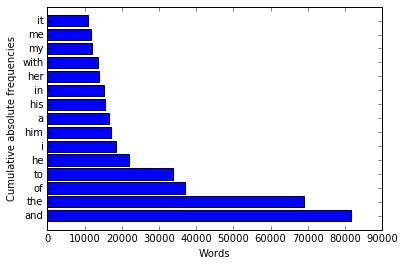

In [50]:
plt.barh(idxs, freqs, align='center')
plt.yticks(idxs, words)
plt.xlabel('Words')
plt.ylabel('Cumulative absolute frequencies')

Et voilà!

## Closing Assignment

In this larger assignment, you will have to perform some basic text processing on the larger set of XML-encoded files under `data/TEI/french_plays`. For this assignment, there are several subtasks:
1. Each of these files represent a play written by a particular author (see the `<author>` element): count how many texts were written by each author in the entire corpus. Make use of a `Counter`.
2. Each play has a cast list (`<castList>`), with a `role`-element for every character in it. In this element, the `civil`-attribute encodes the gender of the character (`M`/`F`, or another charatcer ). Create for each individual author a barplot using `matplotlib`, showing the percentage of male, female and 'other' characters as a percentage. Pick beautiful colors.
3. **Difficult**: The information contained in the `castList` is priceless, because it allows us to determine for *each* word in the play by whom it is uttered, since the `<sp>` tag encodes which character in the cast list is speaking at a particular time. Parse play `156.xml` (*L'Amour à la mode*) and calculate which of the characters has the highest vocabulary richness: divide the number of unique words in the speaker's utterances by the total number of words (s)he utters. Only consider speakers that utter at least 1000 tokens in the play.

Hint: If your run into encoding errors etc. when processing larger text collections, you can always use `try`/`except` constructions to catch these.

---------------------------

Ignore the following, it's just here to make the page pretty:

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

---

<p><small><a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Python Programming for the Humanities</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://fbkarsdorp.github.io/python-course" property="cc:attributionName" rel="cc:attributionURL">http://fbkarsdorp.github.io/python-course</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>. Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/fbkarsdorp/python-course" rel="dct:source">https://github.com/fbkarsdorp/python-course</a>.</small></p>